In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os

import process_plate as pp
from file_chooser import FileChooser
import file_chooser
from IPython.display import display
import importlib
importlib.reload(pp)
importlib.reload(file_chooser)

<module 'file_chooser' from '/Users/evenhuis/Dropbox/MIF/Workflows/clonogenic/file_chooser.py'>

Choose the directory to process. This contains a set of runs.  Each sub-directory must contain  
* DataTable_DATE.xls
* Exp_context_DATE.xls

If a directory can analysed it will be label <font color='green'>green</font>, <font color='red'>red</font> otherwise.

In [14]:
fc = FileChooser()
display(fc)

FileChooser(children=(GridBox(children=(Button(description='Up Directory', style=ButtonStyle()), Select(layout…

Read in the data

In [15]:
path = fc._path
df = pp.read_dir(path)
df.head()

,Plate,Experiment Title,Treatment,Well,Label,Cells Plated,Mask Area (mm^2),Mask Area Total Density (OD),Count,Diameter Average (um),...,Nearest Neighbour Average (um),Nearest Neighbour StdDev,Read-date,Read-time,Plate Type,Resolution Setting,CHARM Settings File,Mask Settings File,Image File,Drug
0,1,UWB1 AS,3.75,1,A01,1500,896.31486,41735.860957,122,285.641022,...,945.153870,1024.892700,24-04-2019,12:15:55,6-Well,600,UWB1.charm,4x6costarplate.mask,C:\Users\Public\Documents\GelCount\Data\Data_2...,ABT888
1,1,UWB1 RNF20si#1,3.75,2,A02,1500,896.31486,38163.987130,29,279.398102,...,988.933472,739.075073,24-04-2019,12:15:55,6-Well,600,UWB1.charm,4x6costarplate.mask,C:\Users\Public\Documents\GelCount\Data\Data_2...,ABT888
2,1,UWB1 RNF20si#3,3.75,3,A03,1500,896.31486,38314.242127,44,268.752289,...,1172.009277,1163.347046,24-04-2019,12:15:55,6-Well,600,UWB1.charm,4x6costarplate.mask,C:\Users\Public\Documents\GelCount\Data\Data_2...,ABT888
3,1,UWB1 AS,0.00,4,B01,1500,896.31486,47606.746091,325,345.915802,...,606.601501,509.362305,24-04-2019,12:15:55,6-Well,600,UWB1.charm,4x6costarplate.mask,C:\Users\Public\Documents\GelCount\Data\Data_2...,ABT888
4,1,UWB1 RNF20si#1,0.00,5,B02,1500,896.31486,40978.131065,163,307.475098,...,775.639404,679.613831,24-04-2019,12:15:55,6-Well,600,UWB1.charm,4x6costarplate.mask,C:\Users\Public\Documents\GelCount\Data\Data_2...,ABT888


Split the 'Experiment Title' into the cell line and the Knock down

In [9]:
pp.split_title(df,['Cell_line','KD_RNF20'])

Calculate the Plating Efficency (PE) and Survival Fraction (SF)

In [10]:
pp.calculate_PE_and_SF(df)

Plot the results

Text(0.5, 0, 'Drug concentration')

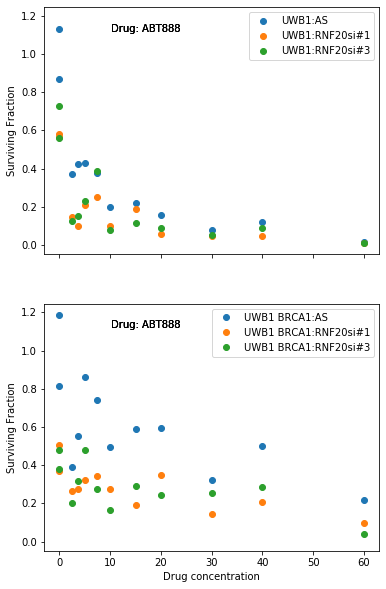

In [11]:

fig, axs = plt.subplots(2,1,sharex=True,figsize=(6,10),sharey=True)
for j,cell_line in enumerate(df['Cell_line'].unique()):
    for i,kd in enumerate(df['KD_RNF20'].unique()):
        mask = (df['Cell_line']==cell_line)&(df['KD_RNF20']==kd)
        drug = df.loc[mask,'Drug'].unique()[0]
        axs[j].plot( df.loc[mask,'Treatment'],df.loc[mask,'SF'],'o',label="{}:{}".format(cell_line,kd))
        axs[j].legend()
        axs[j].set_ylabel("Surviving Fraction")
        axs[j].annotate("Drug: {}".format(drug),xy=(0.2,0.9),xycoords='axes fraction')

axs[-1].set_xlabel("Drug concentration")

Save the combined results

In [12]:
df.to_csv(os.path.join(path,"combined_results.csv"))